In [1]:
# Just to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Importing some libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
dfr = pd.read_csv('winequality-red.csv', sep =',')
dfr = pd.read_csv('winequality-white.csv', sep =';')

In [3]:
dfr.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [4]:
dfr.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [5]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [6]:
dfw = pd.read_csv('winequality-white.csv', sep =';')

In [7]:
dfw.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

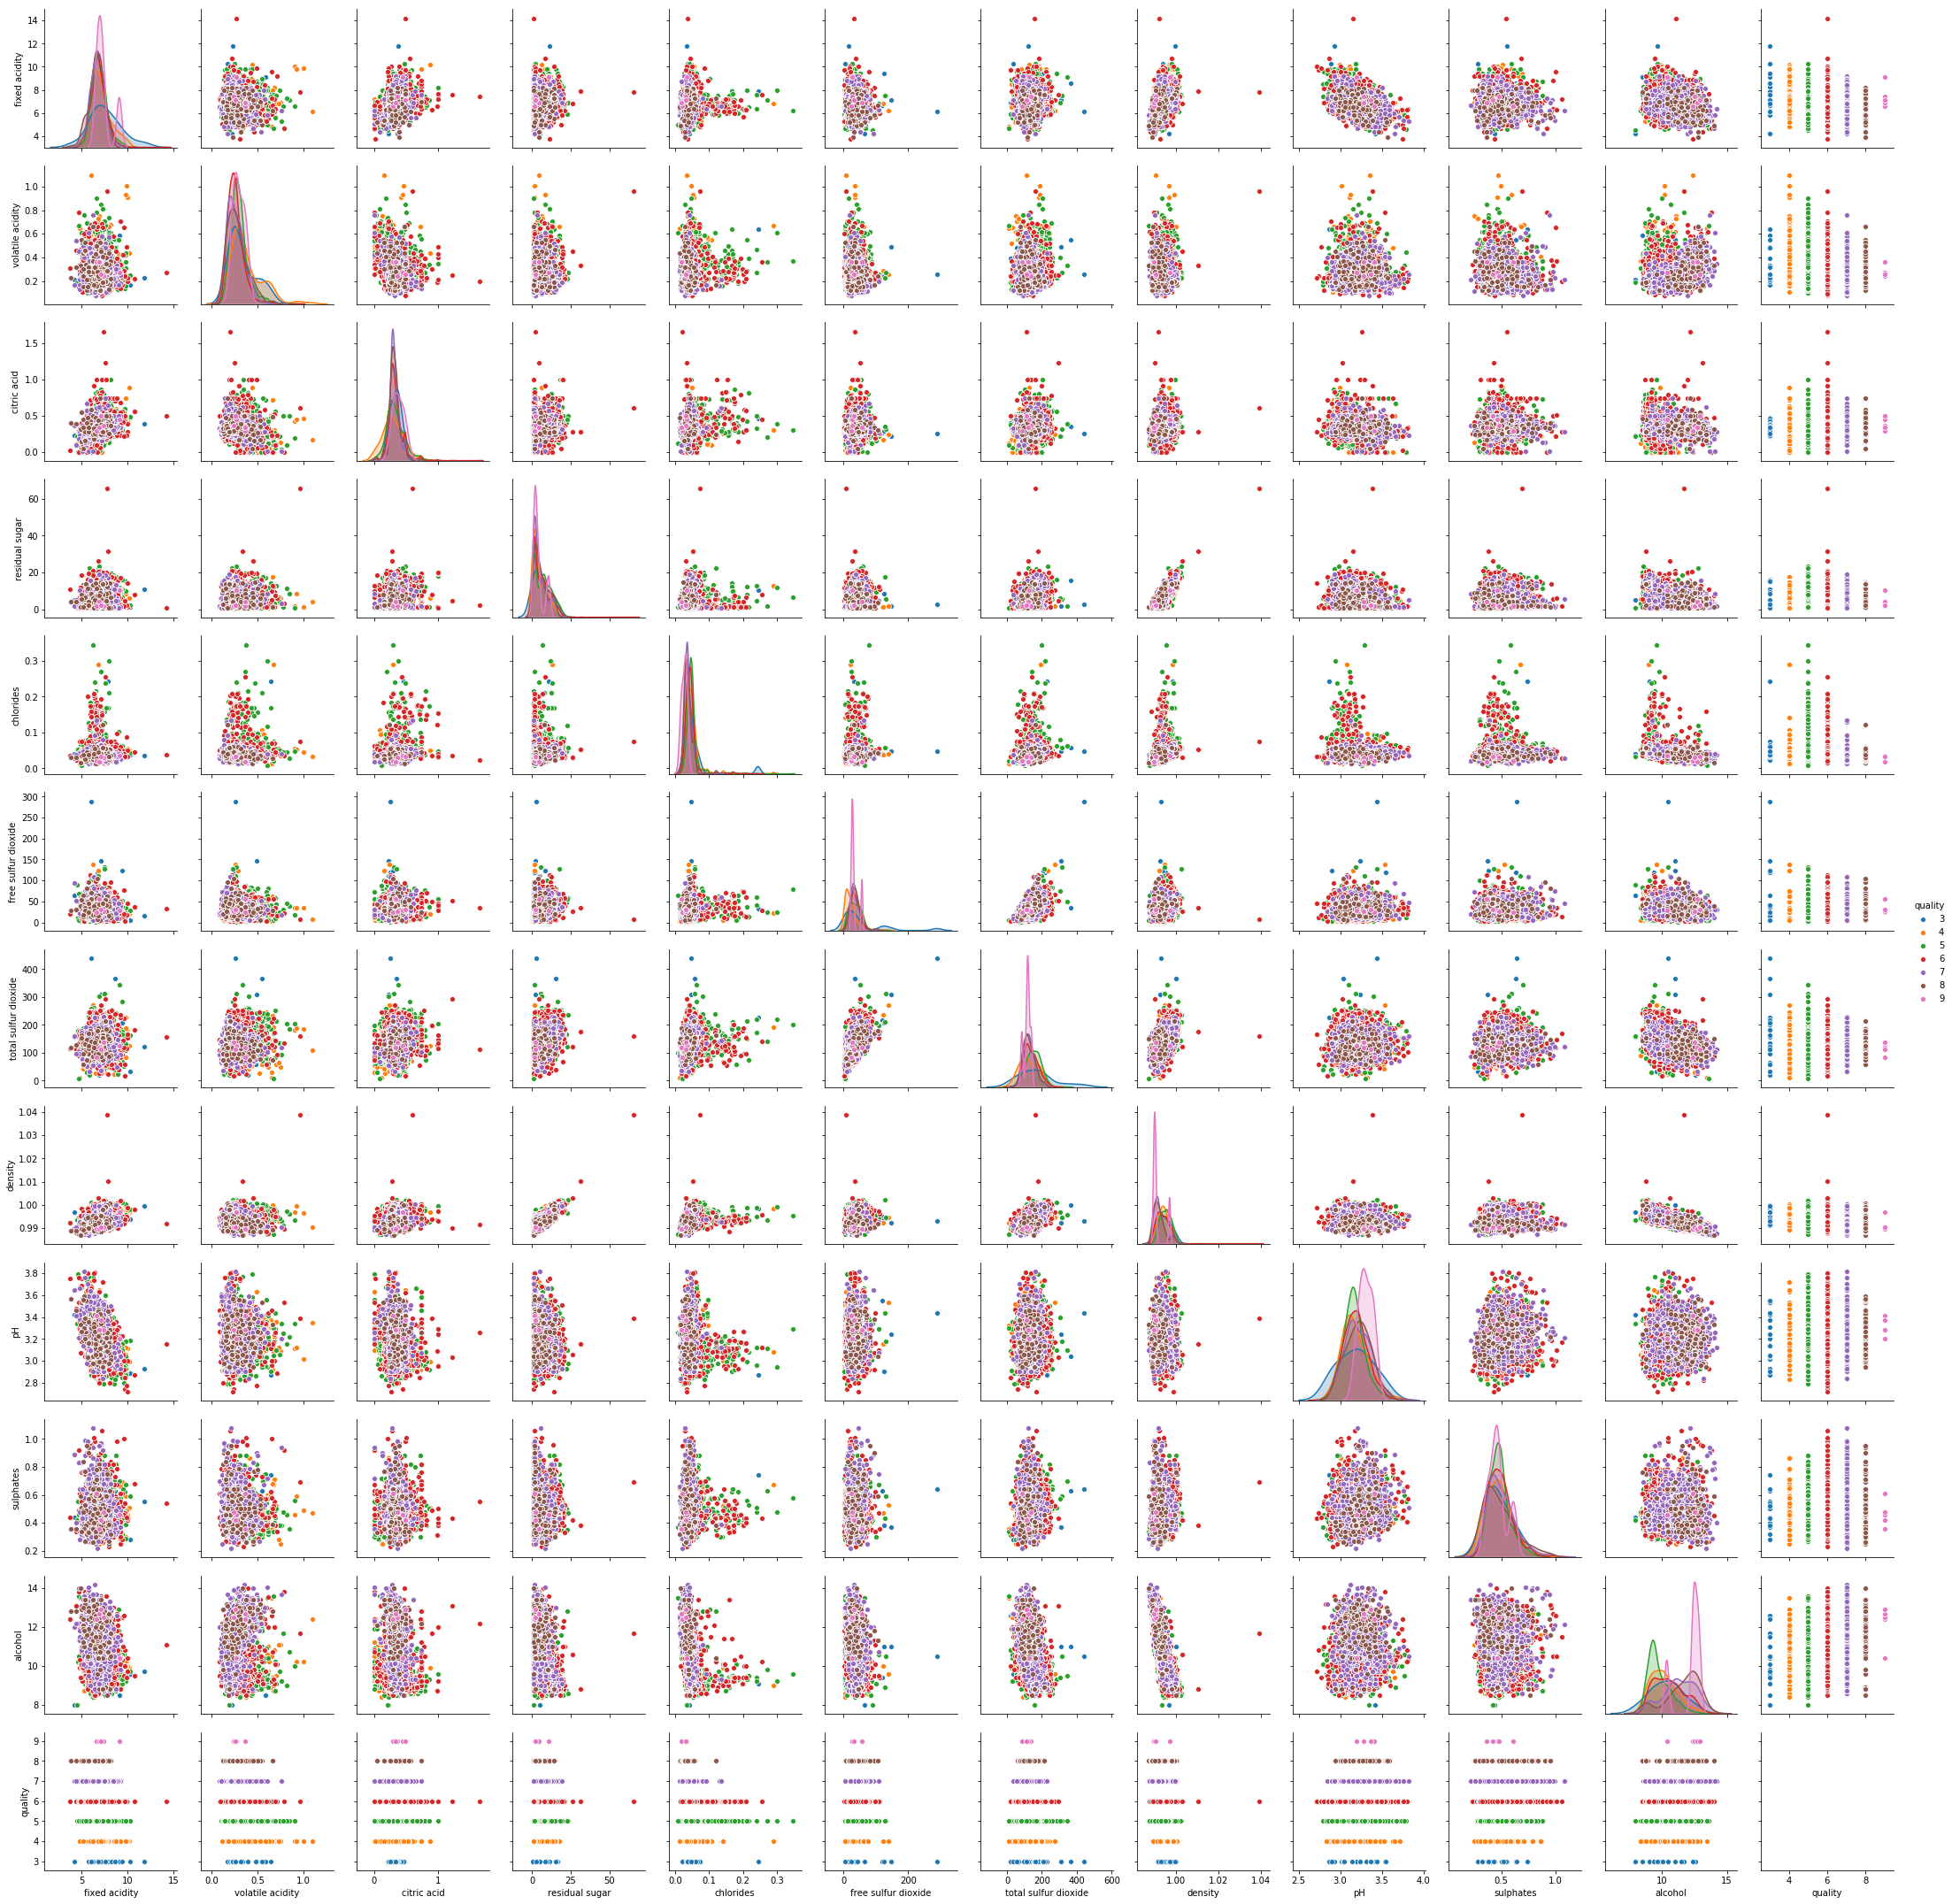

In [8]:
sns.pairplot(dfr, hue = 'quality')

In [9]:
dfr.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

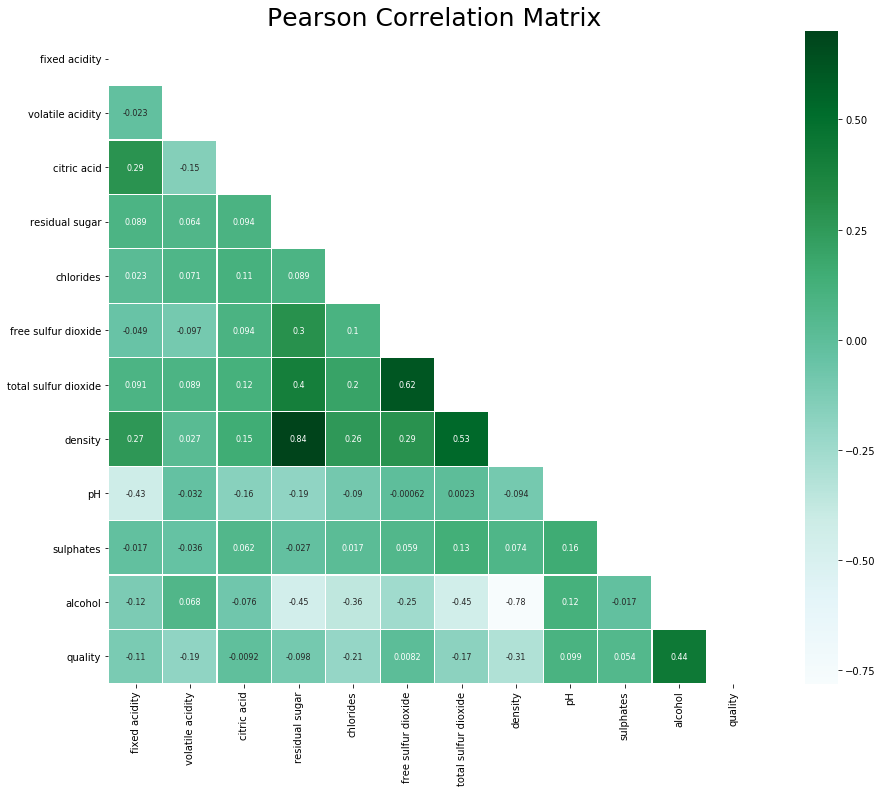

In [10]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

mask = np.zeros_like(dfr[features].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(dfr[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse
           linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": 1});

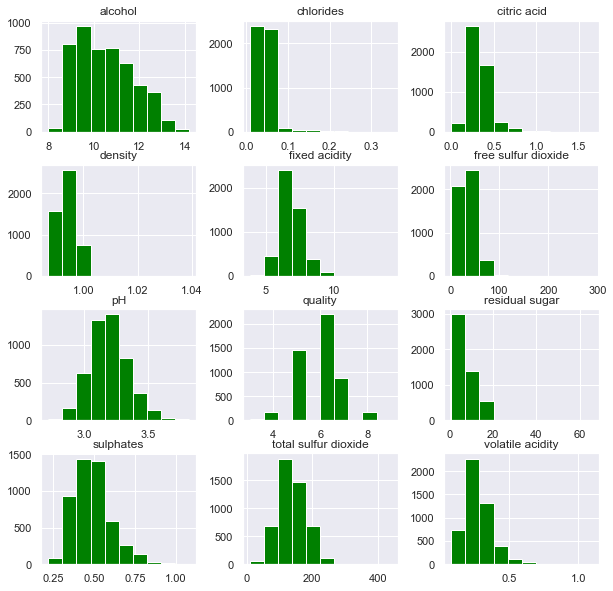

In [11]:
sns.set()
dfr.hist(figsize=(10,10), color='green')
plt.show()

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


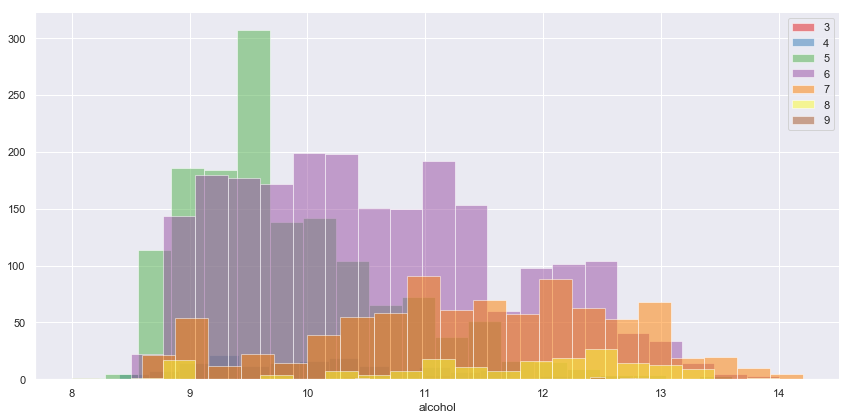

In [12]:
g = sns.FacetGrid(dfr,hue='quality',palette='Set1',size=6,aspect=2)
g = g.map(plt.hist,'alcohol',bins=20,alpha=0.5)
plt.legend()

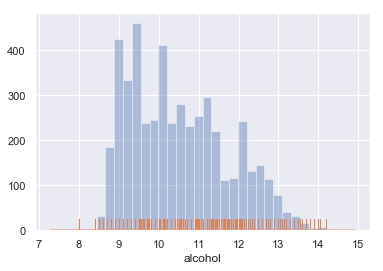

In [13]:
sns.distplot(dfr['alcohol'], kde=False)
sns.rugplot(dfr['alcohol'],color='r')
sns.distplot(dfr['alcohol'], rug=True, hist=False)

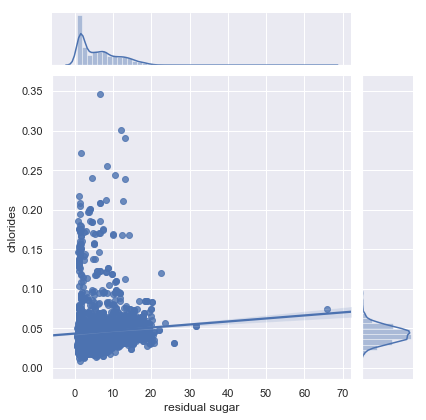

In [14]:
sns.jointplot(x='residual sugar',y='chlorides',data=dfr,kind='reg')

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


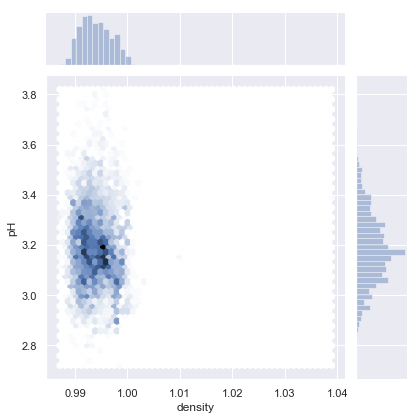

In [15]:
sns.jointplot(x='density',y='pH',data=dfr,kind='hex', size = 6)

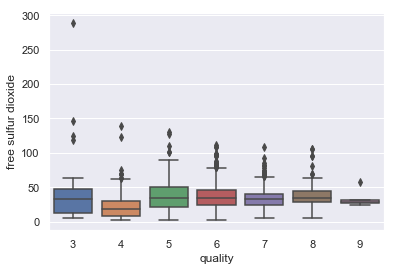

In [16]:
sns.boxplot(y="free sulfur dioxide", x="quality", data=dfr) 

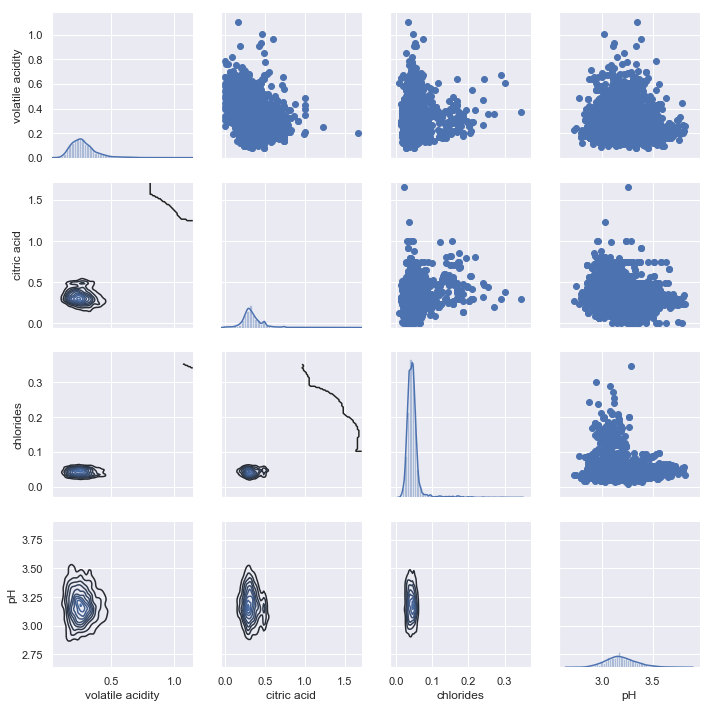

In [17]:
g = sns.PairGrid(dfr[['volatile acidity', 'citric acid', 'chlorides', 'pH']])
g.map_diag(sns.distplot)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)

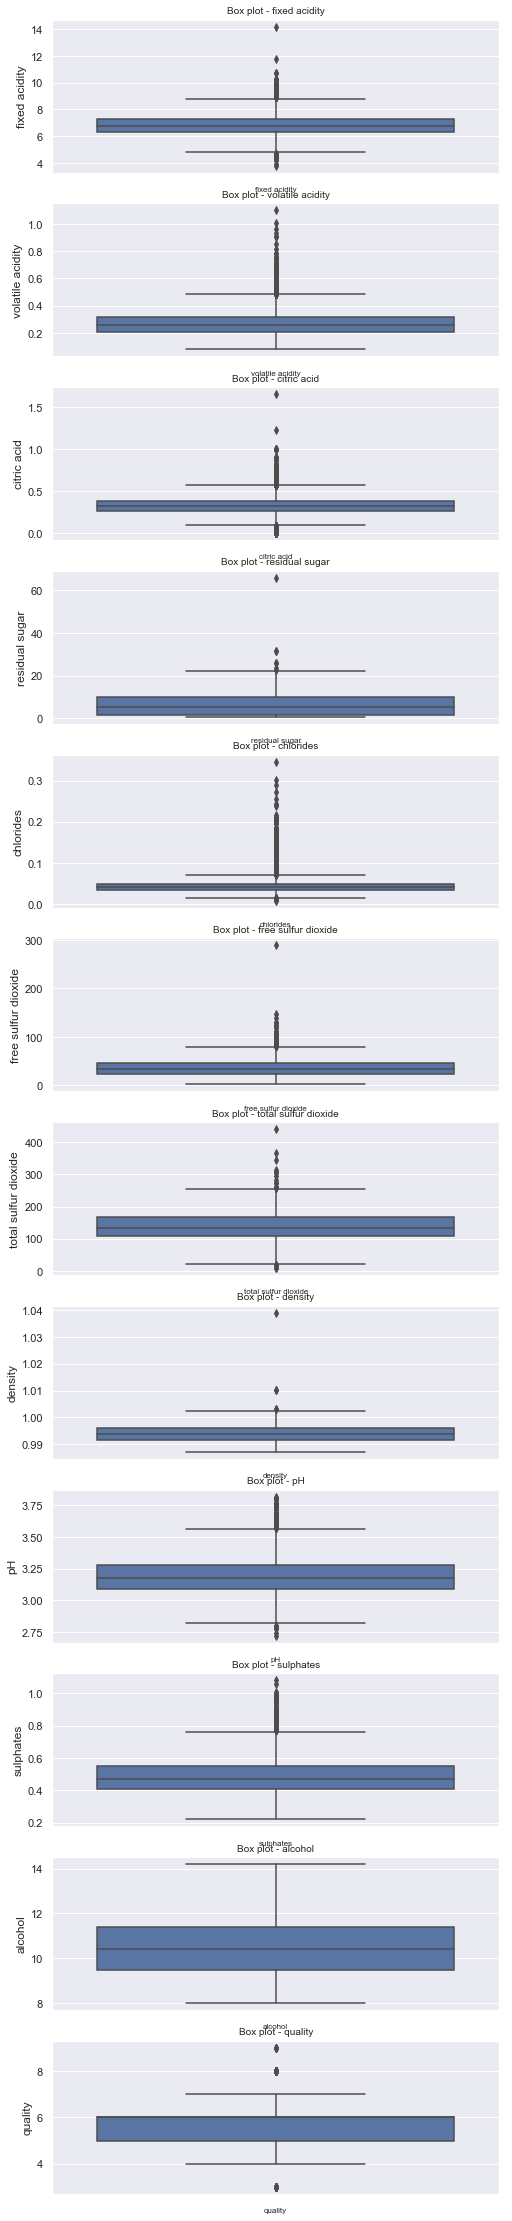

In [18]:
col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

fig, ax = plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=dfr[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

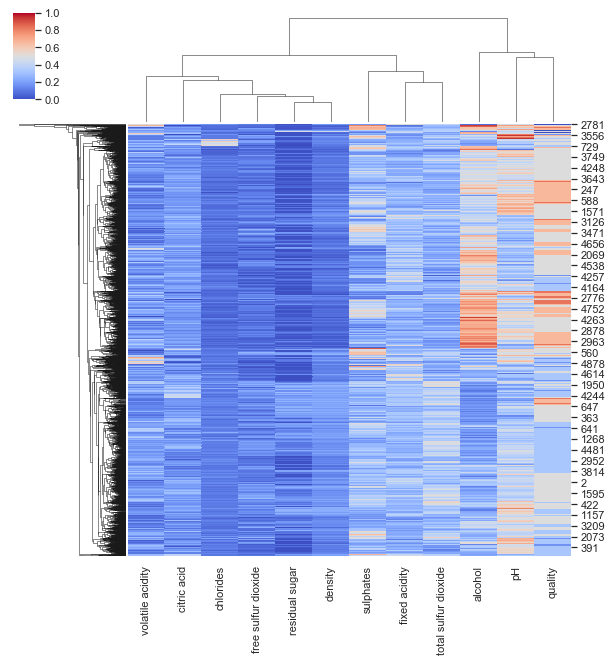

In [19]:
sns.clustermap(dfr, cmap='coolwarm', standard_scale=1)

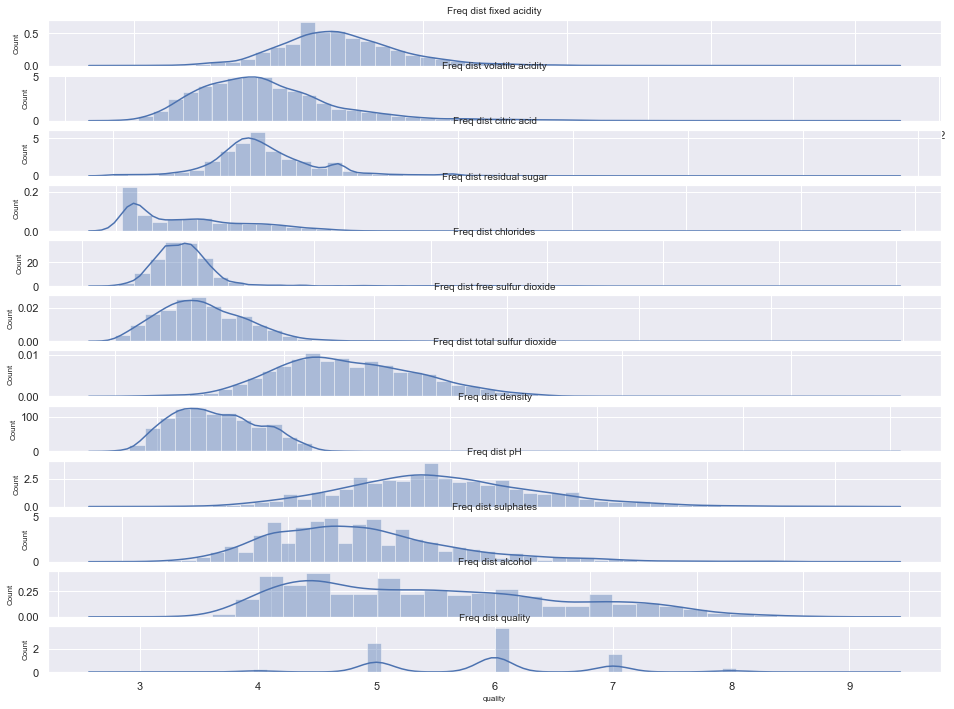

In [20]:
col_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

fig, ax = plt.subplots(len(col_names), figsize=(16,12))

for i, col_val in enumerate(col_names):

    sns.distplot(dfr[col_val], hist=True, ax=ax[i])
    ax[i].set_title('Freq dist '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)



In [ ]:
fig = plt.figure(figsize=(12,10))
ax = sns.kdeplot(df setosa.sepal_width, setosa.sepal_length, cmap="Reds", shade=True, shade_lowest=False)
ax = sns.kdeplot(virginica.sepal_width, virginica.sepal_length, cmap="Blues", shade=True, shade_lowest=False)

In [21]:
dfr.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6  
3      9.9        6  
4      9.9        6

In [22]:
X_ = dfr.drop('quality', axis = 1)

In [23]:
dfr.quality.value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [24]:
X_.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  
0      8.8  
1      9.5  
2     10.1  
3      9.9  
4      9.9

In [25]:
from sklearn.cluster import KMeans
kmeans_6 = KMeans(n_clusters=6, random_state=0)
kmeans_6.fit(X_)
y=kmeans_6.predict(X_) # y=model.fit_predict(x)

In [26]:
centers = kmeans_6.cluster_centers_
centers

array([[6.94590793e+00, 2.88228900e-01, 3.50000000e-01, 8.95716113e+00,
        5.17979540e-02, 4.82563939e+01, 1.84991049e+02, 9.96022231e-01,
        3.18732737e+00, 5.13235294e-01, 9.79341432e+00],
       [6.81714406e+00, 2.76701769e-01, 3.26705981e-01, 5.64987363e+00,
        4.38534120e-02, 3.05842460e+01, 1.26997894e+02, 9.93461276e-01,
        3.19174389e+00, 4.84717776e-01, 1.07318169e+01],
       [7.02258065e+00, 3.07111437e-01, 3.60058651e-01, 1.02124633e+01,
        5.18651026e-02, 5.57609971e+01, 2.24640762e+02, 9.96910235e-01,
        3.17284457e+00, 5.20351906e-01, 9.51906158e+00],
       [6.89093432e+00, 2.74384829e-01, 3.44819611e-01, 7.52317299e+00,
        4.85596670e-02, 4.13469010e+01, 1.54589732e+02, 9.94892562e-01,
        3.19296022e+00, 4.88177613e-01, 1.01981314e+01],
       [6.83371824e+00, 2.83106236e-01, 3.12124711e-01, 3.19122402e+00,
        3.90508083e-02, 1.56905312e+01, 6.91270208e+01, 9.91767564e-01,
        3.17002309e+00, 4.68845266e-01, 1.12215550e+

In [27]:
dfr['klabels'] = kmeans_6.labels_
dfr.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  klabels  
0      8.8        6        0  
1      9.5        6        1  
2     10.1        6        5  
3      9.9        6        0  
4      9.9        6        0

In [28]:
dfr['klabels_6'] = kmeans_6.labels_
dfr.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  klabels  klabels_6  
0      8.8        6        0          0  
1      9.5        6        1          1  
2     10.1        6        5          5  
3      9.9        6        0          0  
4      9.9        6        0          0

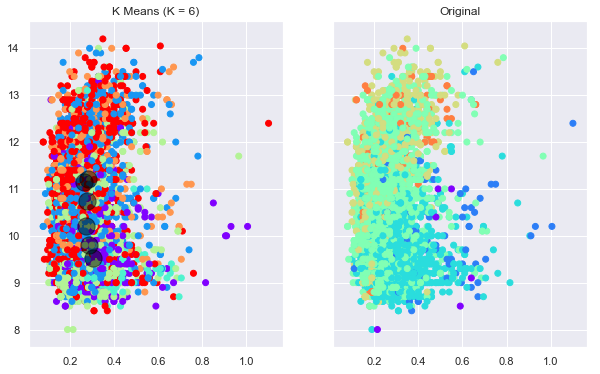

In [29]:
f, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2,
                             sharey = True, figsize = (10,6))

# For fitted with kmeans 
ax1.set_title('K Means (K = 6)')
ax1.scatter(x = dfr['volatile acidity'], y = dfr['alcohol'], 
            c = dfr['klabels_6'], cmap='rainbow')
ax1.scatter(x=centers[:, 1], y=centers[:, 10],
            c='black',s=300, alpha=0.5);

# For original data 
ax2.set_title("Original")
ax2.scatter(x = dfr['volatile acidity'], y = dfr['alcohol'], 
            c = dfr['quality'], cmap='rainbow')

In [30]:
dfr.quality.value_counts() # 6 classes

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

In [32]:
print(confusion_matrix(dfr['quality'], kmeans_6.labels_))
print(classification_report(dfr['quality'], kmeans_6.labels_))#

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  3   2   6   2   4   3   0   0   0   0]
 [ 28  26   8  21  45  35   0   0   0   0]
 [356 299 159 342 113 188   0   0   0   0]
 [325 527 145 492 182 527   0   0   0   0]
 [ 56 279  17 189  74 265   0   0   0   0]
 [ 14  54   6  35  15  51   0   0   0   0]
 [  0   3   0   0   0   2   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.10      0.00        20
           4       0.10      0.28      0.15       163
           5       0.18      0.13      0.15      1457
           6       0.00      0.00      0.00      2198
           7       0.00      0.00      0.00       880
           8       0.00      0.00      0.00       175
           9       0.00     

/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average

In [33]:
dfr.klabels_6.value_counts()

1    1190
3    1081
5    1071
0     782
4     433
2     341
Name: klabels_6, dtype: int64

In [34]:
# we can deal with the case at the same time, GREEN, Green or green are same here
def rearrange_quality(x):
    if x == 5:
        return 1
    if x == 6:
        return 3
    if x == 7:
        return 0
    if x == 4:
        return 4 
    if x == 8:
        return 2
    if x == 3:
        return 5 

In [35]:
dfr['quality_new'] = dfr['quality'].apply(rearrange_quality)

In [36]:
dfr.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  klabels  klabels_6  quality_new  
0      8.8        6        0          0          3.0  
1      9.5        6        1          1          3.0  
2     10.1        6        5          5          3.0  
3      9.9        6        0          0          3.0  
4      9.9        6        0          0          3.0

In [40]:
print(confusion_matrix(dfr['quality'], kmeans_6.labels_))

[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  3   2   6   2   4   3   0   0   0   0]
 [ 28  26   8  21  45  35   0   0   0   0]
 [356 299 159 342 113 188   0   0   0   0]
 [325 527 145 492 182 527   0   0   0   0]
 [ 56 279  17 189  74 265   0   0   0   0]
 [ 14  54   6  35  15  51   0   0   0   0]
 [  0   3   0   0   0   2   0   0   0   0]]


In [41]:
print(classification_report(dfr['quality'], kmeans_6.labels_))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.10      0.00        20
           4       0.10      0.28      0.15       163
           5       0.18      0.13      0.15      1457
           6       0.00      0.00      0.00      2198
           7       0.00      0.00      0.00       880
           8       0.00      0.00      0.00       175
           9       0.00      0.00      0.00         5

   micro avg       0.05      0.05      0.05      4898
   macro avg       0.03      0.05      0.03      4898
weighted avg       0.06      0.05      0.05      4898



/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/Vsevolod/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average

In [46]:
# sum_square will be key,value pair for the elbow plot!
sum_square = {}
# Let's test for K from 1 to 10, we can use range() function here! remember?
for k in range(1, 20):
    kmeans_6 = KMeans(n_clusters=k).fit(X_)
    # .inertia: Computing Sum of Squared Distances of samples to their closest cluster center.
    sum_square[k] = kmeans_6.inertia_  

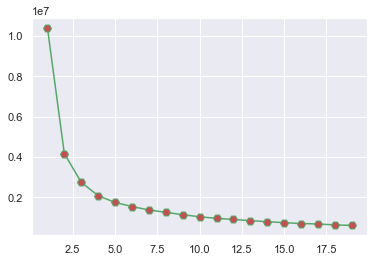

In [48]:
plt.plot(list(sum_square.keys()), list(sum_square.values()),
         linestyle ='-', marker = 'H', color = 'g',
         markersize = 8,markerfacecolor = 'r')

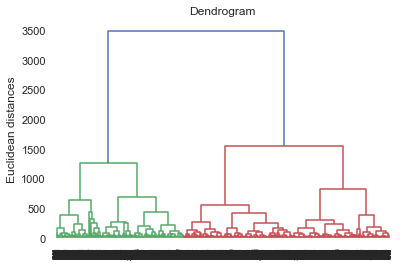

In [54]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_, method ='ward'))

import matplotlib.pyplot as plt
plt.title('Dendrogram')
#plt.xlabel('Customers')
plt.ylabel('Euclidean distances')

from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters = 6, affinity ='euclidean', linkage ='ward')
y = model.fit_predict(X_)